In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.drop(columns="Unnamed: 0", inplace = True)

<Axes: >

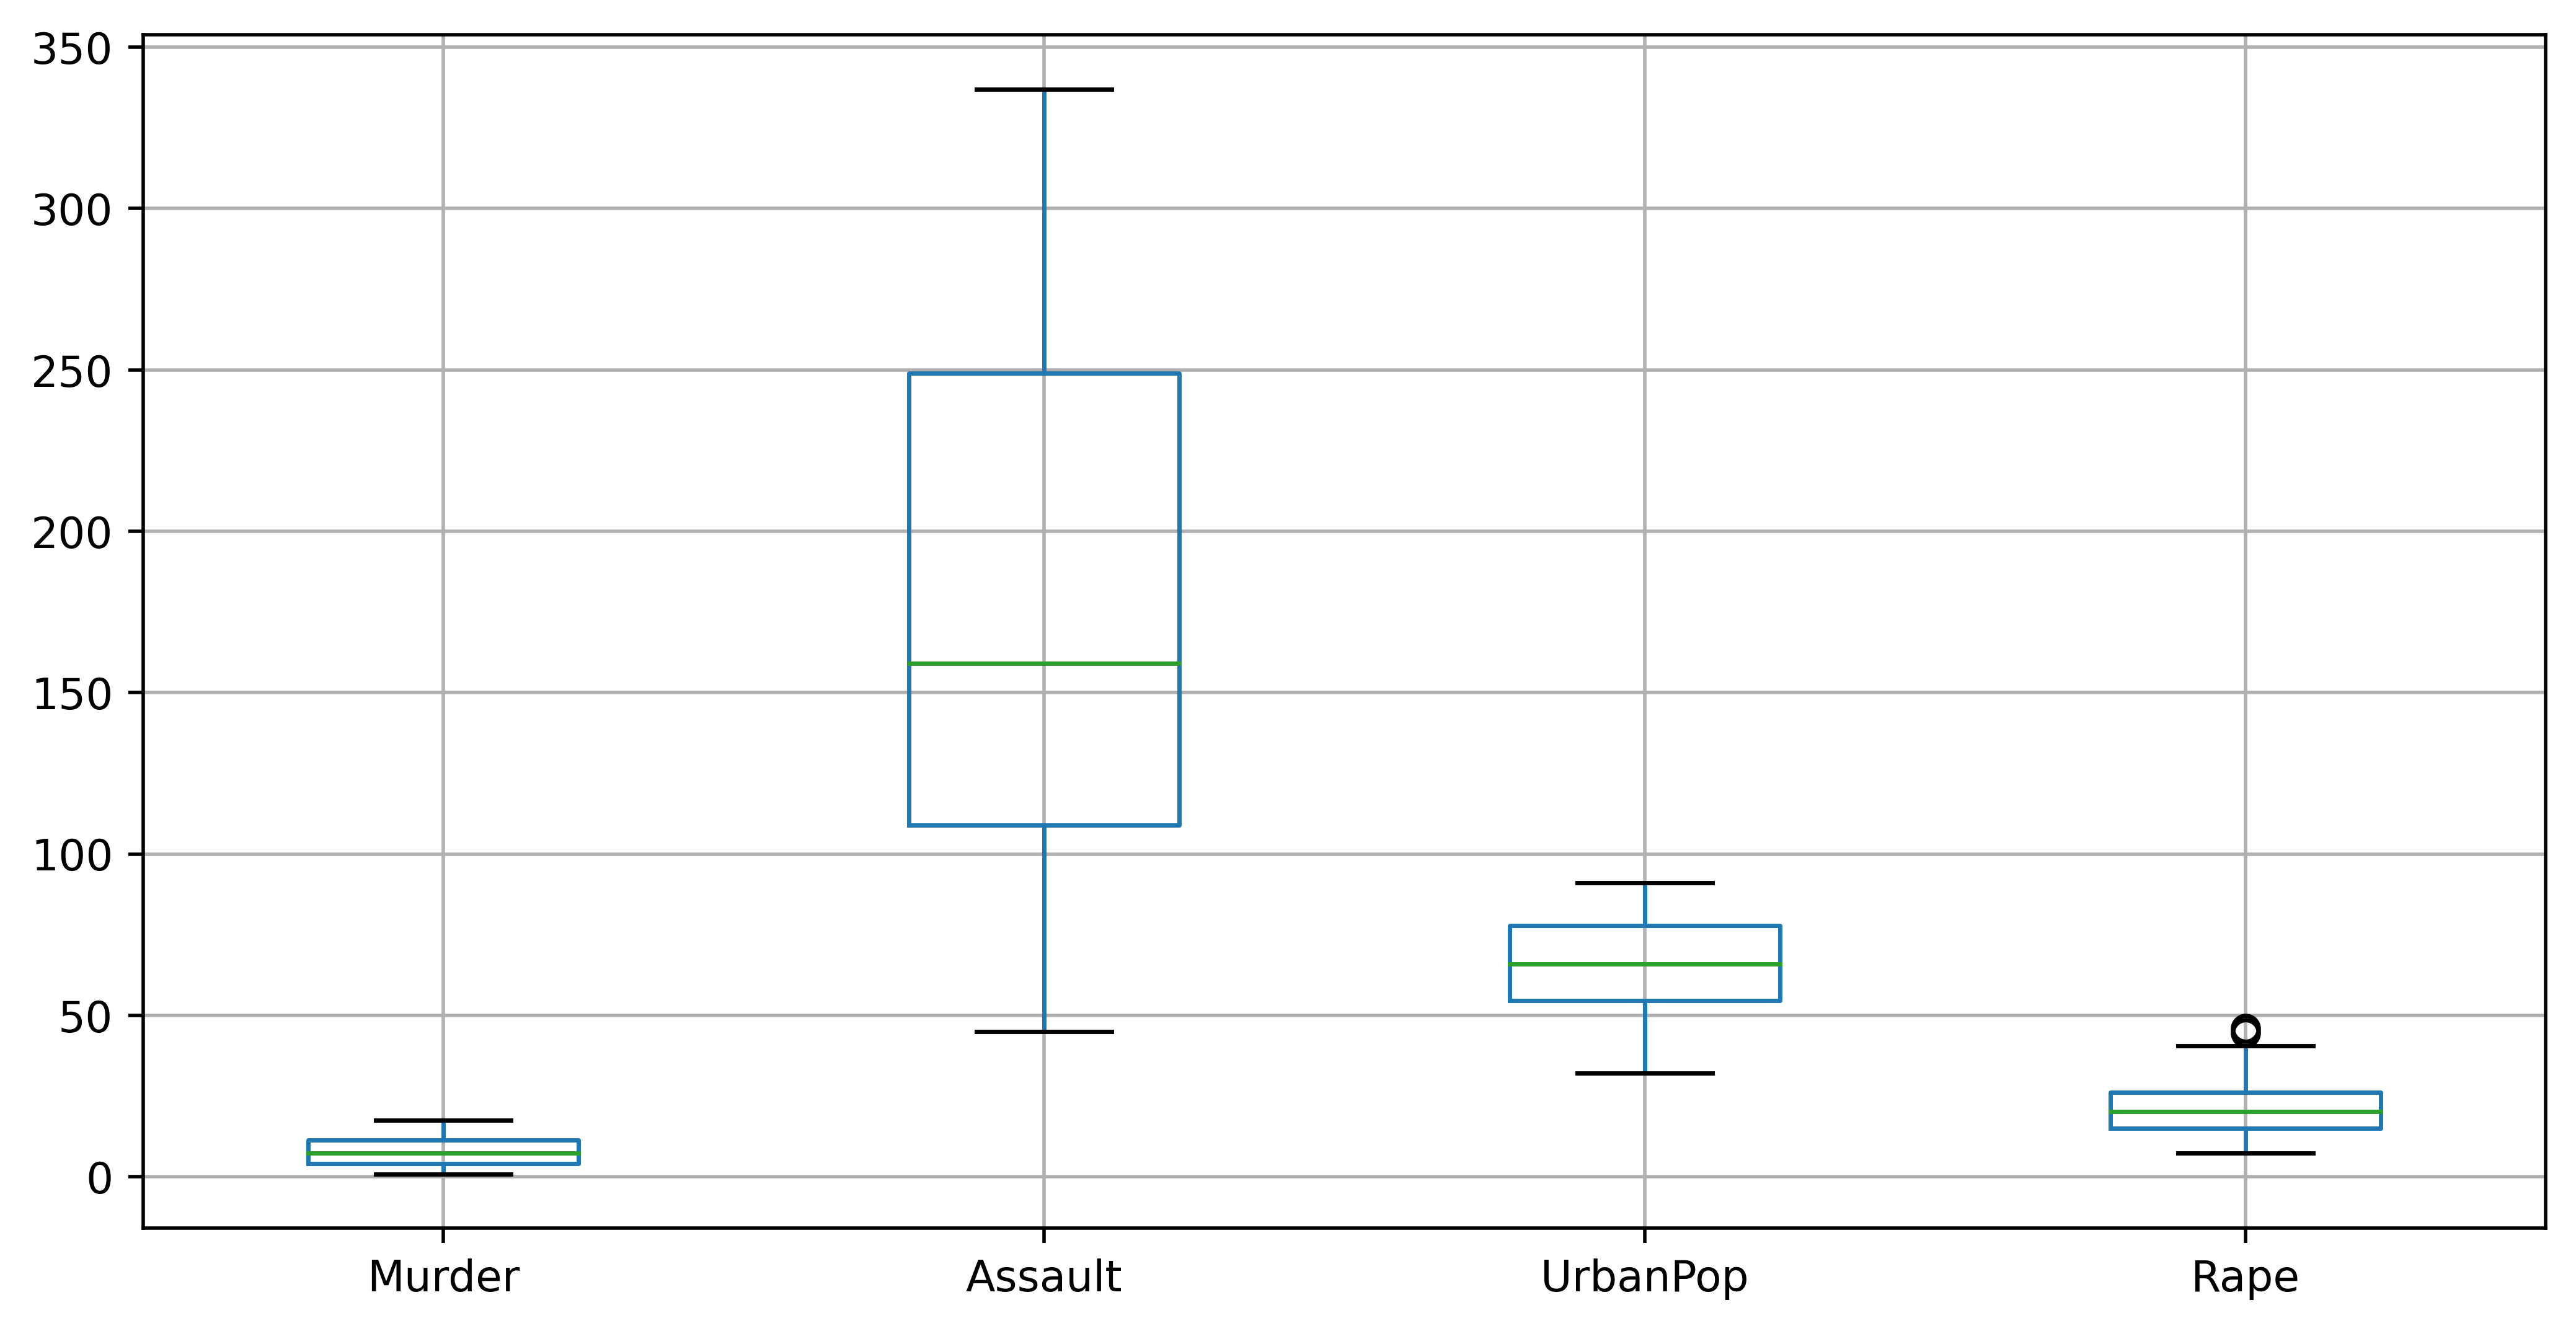

In [4]:
df.boxplot()

In [5]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [10]:
db = DBSCAN(eps=1, min_samples=3)
ypred = db.fit_predict(x)
ypred

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [11]:
silhouette_score(x,ypred)

0.19290975823254836

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [14]:
d, index = neigh.kneighbors(x)

In [15]:
d

array([[0.        , 0.78006247, 0.84928467],
       [0.        , 2.07898369, 2.13697134],
       [0.        , 1.0482199 , 1.08341076],
       [0.        , 1.0013278 , 1.00722663],
       [0.        , 1.20897691, 1.30069114],
       [0.        , 1.24886253, 1.30069114],
       [0.        , 0.88100359, 0.95643249],
       [0.        , 1.19227586, 1.27140067],
       [0.        , 1.30974334, 1.34926273],
       [0.        , 0.86797806, 1.02250187],
       [0.        , 1.08184506, 1.16110091],
       [0.        , 0.75913104, 0.81522244],
       [0.        , 0.35377437, 0.83250223],
       [0.        , 0.43312429, 0.53571007],
       [0.        , 0.2079438 , 0.63822131],
       [0.        , 0.43312429, 0.52515083],
       [0.        , 0.8610239 , 1.07057017],
       [0.        , 0.78006247, 0.86797806],
       [0.        , 0.50466926, 0.65227142],
       [0.        , 0.54082482, 1.09106451],
       [0.        , 0.80586349, 0.91073424],
       [0.        , 0.58411812, 1.09106451],
       [0.

In [16]:
distance = np.sort(d[:,1])
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

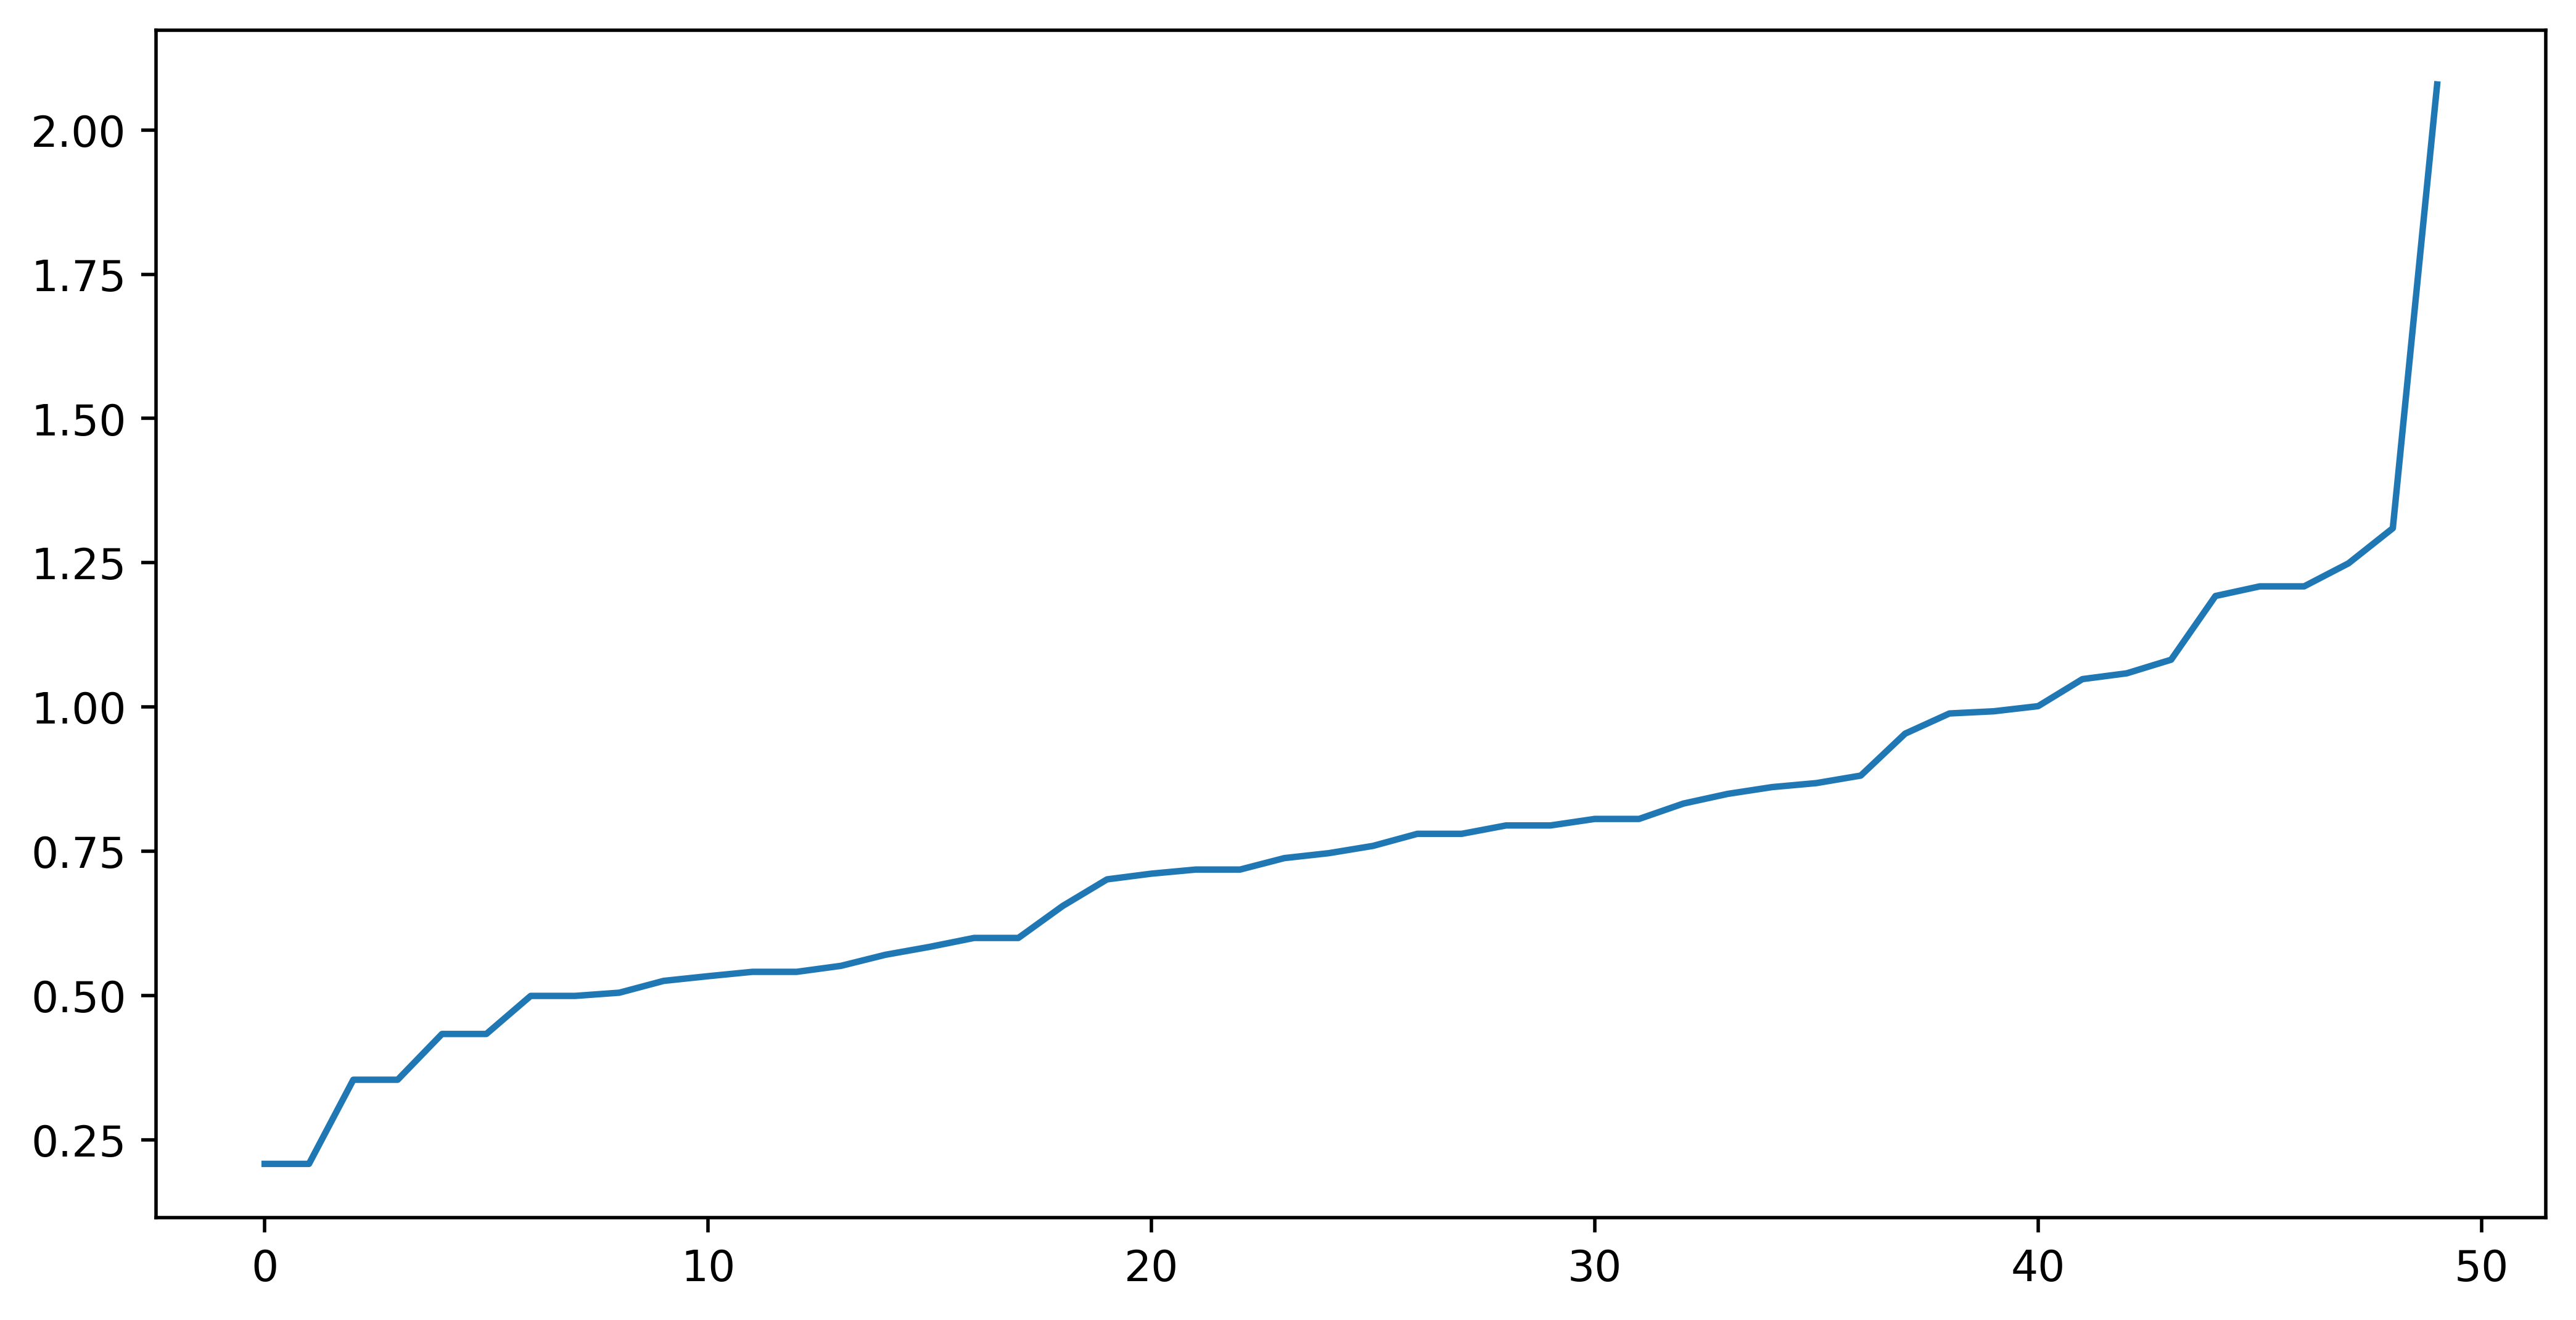

In [17]:
plt.plot(distance)

In [18]:
db = DBSCAN(eps=1, min_samples=3)
ypred = db.fit_predict(x)
ypred

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [19]:
silhouette_score(x,ypred)

0.19290975823254836